In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import math


## part 1

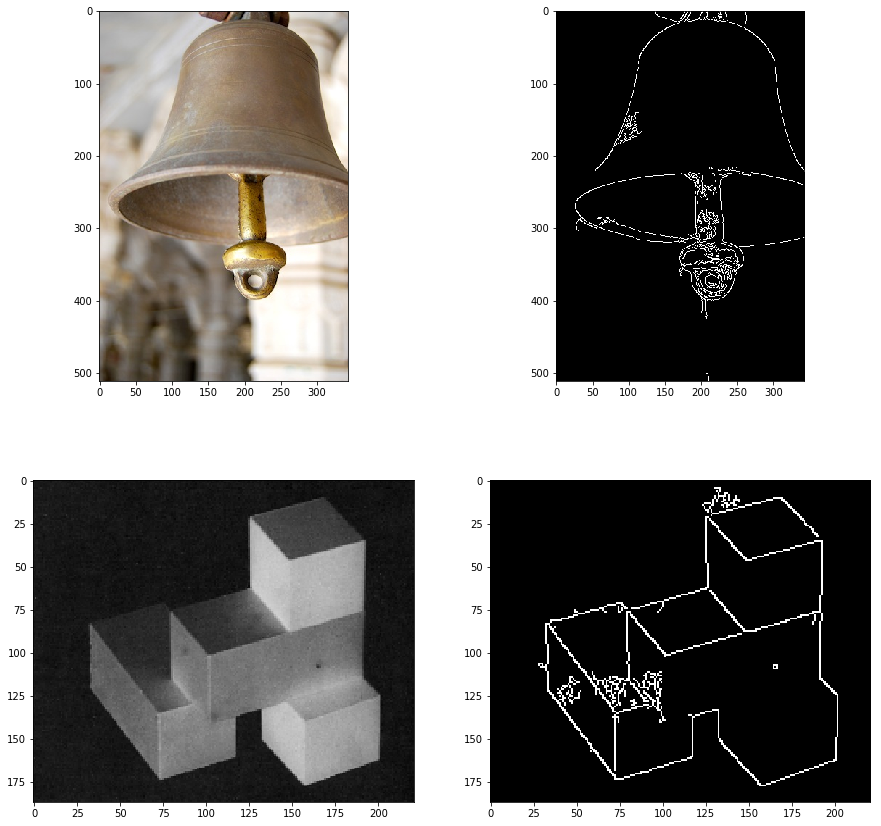

In [107]:
bell = cv2.imread("../input_data/bell.jpg")
cube = cv2.imread("../input_data/cubes.png")

bell_edge = cv2.Canny(bell,350,5)
cube_edge = cv2.Canny(cube, 2,300)

fig, axs = plt.subplots(2,3,figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(bell, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(bell_edge,'gray')
plt.subplot(2,2,3)
plt.imshow(cube,'gray')
plt.subplot(2,2,4)
plt.imshow(cube_edge,'gray')

plt.show()

## part 2

In [108]:
def myConvolve(img_array,Gx,Gy):
    r , c = np.shape(img_array)
    output_array = np.empty([(r-2)*(c-2)])
    i=0
    for x in range(1,r-1):
        for y in range(1,c-1):
            v = img_array[x-1,y-1]*Gx[0,0]  + img_array[x-1,y]*Gx[0,1] + img_array[x-1,y+1]*Gx[0,2] + img_array[x,y-1]*Gx[1,0] + img_array[x,y]*Gx[1,1] + img_array[x,y+1]*Gx[1,2] + img_array[x+1,y-1]*Gx[2,0] + img_array[x+1,y]*Gx[2,1] + img_array[x+1,y+1]*Gx[2,2]
            w = img_array[x-1,y-1]*Gy[0,0]  + img_array[x-1,y]*Gy[0,1] + img_array[x-1,y+1]*Gy[0,2] + img_array[x,y-1]*Gy[1,0] + img_array[x,y]*Gy[1,1] + img_array[x,y+1]*Gy[1,2] + img_array[x+1,y-1]*Gy[2,0] + img_array[x+1,y]*Gy[2,1] + img_array[x+1,y+1]*Gy[2,2]
            # output_array[i] = v
            # output_array[i] = w
            output_array[i] = math.sqrt((v**2) + (w**2))
            i=i+1

    output = np.reshape(output_array, (-1,r-2))
    return output



In [109]:
def myConvolveRob(img_array,Gx,Gy):
    r , c = np.shape(img_array)
    output_array = np.empty([(r-2)*(c-2)])
    i=0
    for x in range(1,r-1):
        for y in range(1,c-1):
            v = img_array[x-1,y-1]*Gx[0,0] + img_array[x-1,y]*Gx[0,1] + img_array[x,y-1]*Gx[1,0] + img_array[x,y]*Gx[1,1]
            w = img_array[x-1,y-1]*Gy[0,0] + img_array[x-1,y]*Gy[0,1] + img_array[x,y-1]*Gy[1,0] + img_array[x,y]*Gy[1,1]
            # output_array[i] = v
            # output_array[i] = w
            output_array[i] = math.sqrt((v**2) + (w**2))
            i=i+1

    output = np.reshape(output_array, (-1,r-2))
    return output

Text(0.5, 1.0, 'Canny')

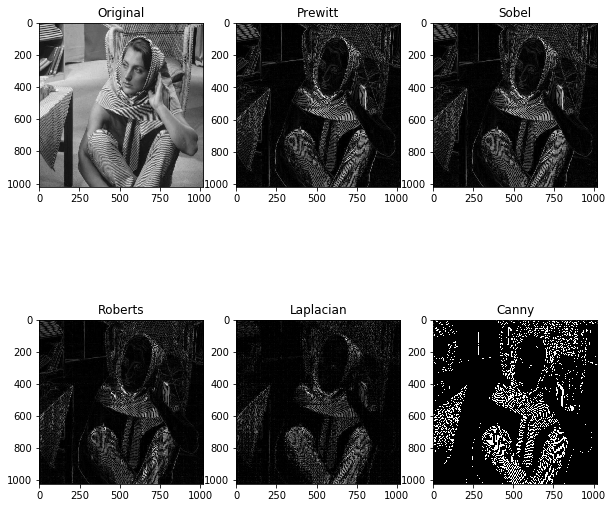

In [110]:
## roberts filter 

prewx = np.array([ [-1, 0, 1], [-1, 0, 1], [-1, 0, 1] ])
prewy = np.array([ [1,1,1], [0,0,0], [-1,-1,-1] ])
sobx = np.array([ [-1,0,1], [-2,0,2], [-1,0,1]])
soby = np.array([ [1,2,1], [0,0,0], [-1,-2,-1]])
robx = np.array([ [0,1],[-1,0]])
roby = np.array([ [1,0],[0,-1]])
lapx = np.array([ [0,1,0], [1,-4,1], [0,1,0]])
lapy = np.array([ [1,1,1], [1,-8,1], [1,1,1]])


im = cv2.imread("../input_data/barbara.jpg",0)

finals = myConvolve(im,sobx,soby)
finalp = myConvolve(im,prewx,prewy)
finalr = myConvolveRob(im,robx,roby)
finall = myConvolve(im,lapx,lapy)
can = cv2.Canny(im,50,150)

fig, axs = plt.subplots(2,3,figsize=(10,10))

plt.subplot(2,3,1)
plt.imshow(im,'gray')
plt.title("Original")
plt.subplot(2,3,2)
plt.imshow(finalp,'gray')
plt.title("Prewitt")
plt.subplot(2,3,3)
plt.imshow(finals,'gray')
plt.title("Sobel")
plt.subplot(2,3,4)
plt.imshow(finalr,'gray')
plt.title("Roberts")
plt.subplot(2,3,5)
plt.imshow(finall,'gray')
plt.title("Laplacian")
plt.subplot(2,3,6)
plt.imshow(can,'gray')
plt.title("Canny")

# plt.show()

## part 3

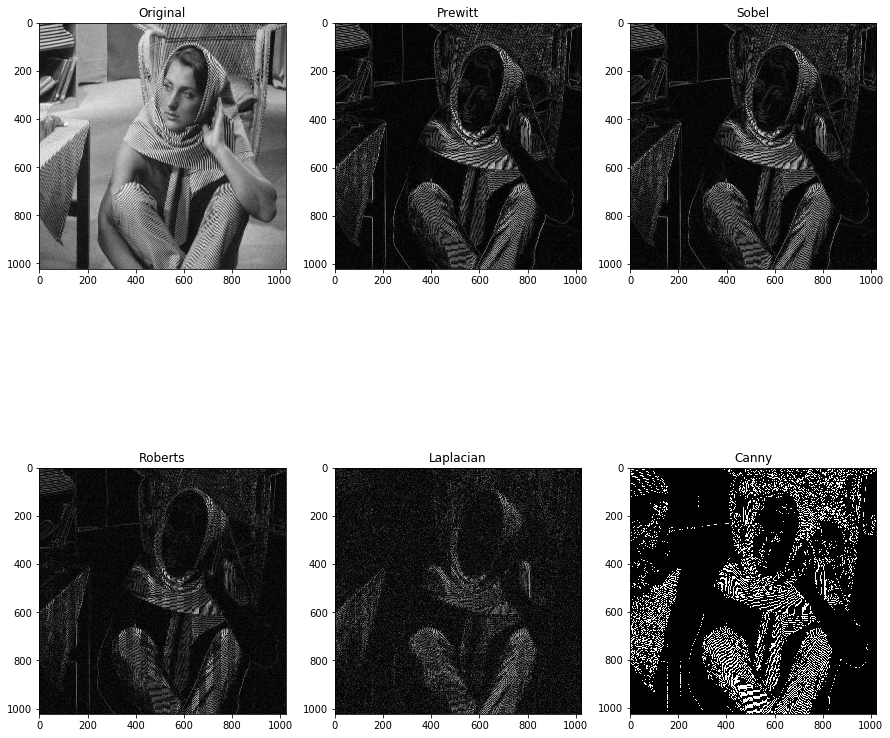

In [111]:
# adding noise
img = cv2.imread("../input_data/barbara.jpg",0)

mean = 0
var = 10
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, (1024, 1024)) #  np.zeros((224, 224), np.float32)

im = np.zeros(img.shape, np.float32)

if len(img.shape) == 2:
    im = img + gaussian
else:
    im[:, :, 0] = img[:, :, 0] + gaussian
    im[:, :, 1] = img[:, :, 1] + gaussian
    im[:, :, 2] = img[:, :, 2] + gaussian

cv2.normalize(im, im, 0, 255, cv2.NORM_MINMAX, dtype=-1)
im = im.astype(np.uint8)

# fig2 = plt.figure()

dstp = myConvolve(im,prewx,prewy)
dsts = myConvolve(im,sobx,soby)
dstr = myConvolveRob(im,robx,roby)
dstl = myConvolve(im,lapx,lapy)

can = cv2.Canny(im,50,150)

fig, axs = plt.subplots(2,3,figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(im,'gray')
plt.title("Original")
plt.subplot(2,3,2)
plt.imshow(dstp,'gray')
plt.title("Prewitt")
plt.subplot(2,3,3)
plt.imshow(dsts,'gray')
plt.title("Sobel")
plt.subplot(2,3,4)
plt.imshow(dstr,'gray')
plt.title("Roberts")
plt.subplot(2,3,5)
plt.imshow(dstl,'gray')
plt.title("Laplacian")
plt.subplot(2,3,6)
plt.imshow(can,'gray')
plt.title("Canny")

plt.show()
